In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [50]:
# Load the CSV data
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [51]:
# Basic exploration
print("Dataset shape:", gold_data.shape)
print("\nMissing values:\n", gold_data.isnull().sum())
print("\nStatistical Summary:\n", gold_data.describe())

Dataset shape: (2290, 6)

Missing values:
 Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Statistical Summary:
                SPX          GLD          USO          SLV      EUR/USD
count  2290.000000  2290.000000  2290.000000  2290.000000  2290.000000
mean   1654.315776   122.732875    31.842221    20.084997     1.283653
std     519.111540    23.283346    19.523517     7.092566     0.131547
min     676.530029    70.000000     7.960000     8.850000     1.039047
25%    1239.874969   109.725000    14.380000    15.570000     1.171313
50%    1551.434998   120.580002    33.869999    17.268500     1.303297
75%    2073.010070   132.840004    37.827501    22.882500     1.369971
max    2872.870117   184.589996   117.480003    47.259998     1.598798


In [52]:
# Correlation matrix (only numeric columns)
correlation = gold_data.select_dtypes(include='number').corr()

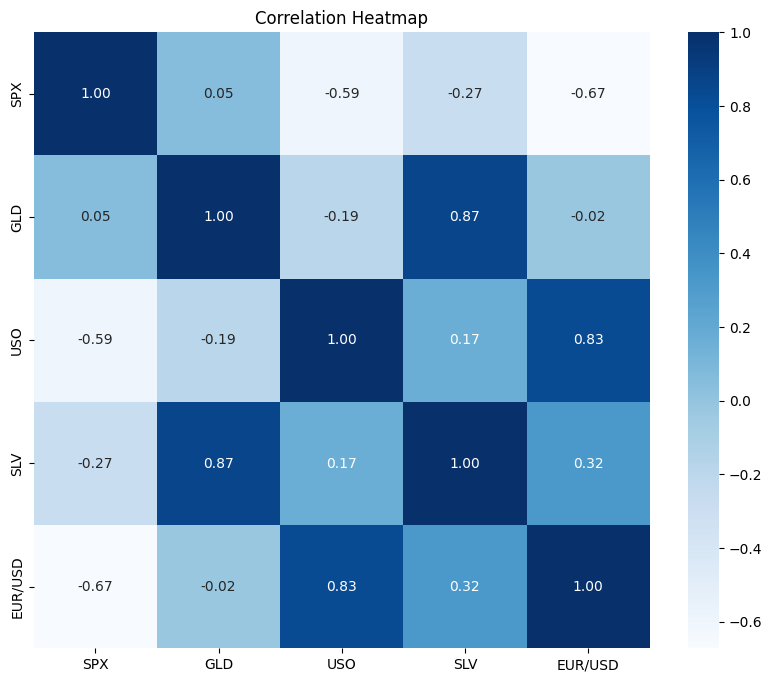

In [53]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='Blues', square=True, cbar=True)
plt.title("Correlation Heatmap")
plt.show()

In [54]:
# Correlation with GLD
print("\nCorrelation with GLD:\n", correlation['GLD'].sort_values(ascending=False))


Correlation with GLD:
 GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64


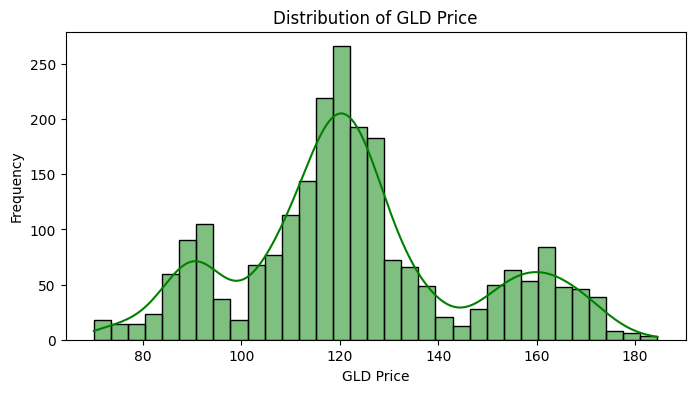

In [55]:
# Distribution plot
plt.figure(figsize=(8, 4))
sns.histplot(gold_data['GLD'], kde=True, color='green')
plt.title("Distribution of GLD Price")
plt.xlabel("GLD Price")
plt.ylabel("Frequency")
plt.show()

In [56]:
# Preparing data
X = gold_data.drop(columns=[col for col in ['Date', 'GLD'] if col in gold_data.columns])
Y = gold_data['GLD']

In [57]:
# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [58]:
# Model training
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [59]:
# Predictions
predictions = regressor.predict(X_test)

In [62]:
# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)

print(f"R² Score       : {r2:.4f}")
print(f"MAE (avg error): {mae:.4f}")
print(f"MSE            : {mse:.4f}")
print(f"RMSE           : {rmse:.4f}")

R² Score       : 0.9887
MAE (avg error): 1.3536
MSE            : 5.9588
RMSE           : 2.4411


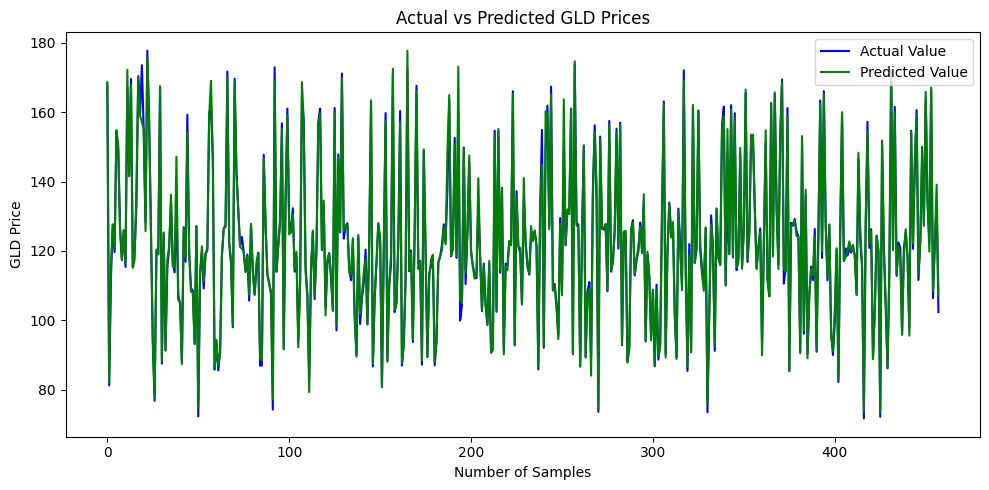

In [61]:
# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(Y_test.values, label='Actual Value', color='blue')
plt.plot(predictions, label='Predicted Value', color='green')
plt.title("Actual vs Predicted GLD Prices")
plt.xlabel("Number of Samples")
plt.ylabel("GLD Price")
plt.legend()
plt.tight_layout()
plt.show()